In [8]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from dotenv import load_dotenv
import pandas as pd
from langchain.chat_models import ChatOpenAI
load_dotenv()

True

In [9]:
base_path = '/home/john/Proyectos/chatbot/chatbot_beneficios/server'
db = FAISS.load_local(base_path + '/output/embeddings_faiss_index', OpenAIEmbeddings())

In [4]:
comparativo_sura_df = pd.read_csv(base_path + '/data/comparativo_sura.csv')
comparativo_sura_df = comparativo_sura_df.drop(columns='Entidad')
groupby_servicios = comparativo_sura_df.groupby(['Servicio'])
servicios_dfs = {name_group[0]: group.drop(columns='Servicio') for name_group, group in groupby_servicios}

title = '# Comparativo sura' 
subtitle = '## Servicio {}:'
description = 'Descripción tabla: Coberturas Sura por el servicio {} de medicina prepagada Sura Global y Clásica'

text = title
for servicio, df in servicios_dfs.items():
    text += (
        '\n\n'
        + subtitle.format(servicio)
        + '\n\n'
        + description.format(servicio)
        + '\n\n'
        + servicios_dfs[servicio].to_markdown(index=False)
    )

text = text.replace('|:-', '|--')
print(text)

with open(base_path + '/data/comparativo_sura.md', 'w') as f:
    f.write(text)

# Comparativo sura

## Servicio Consulta Externa Ilimitada:

Descripción tabla: Coberturas Sura por el servicio Consulta Externa Ilimitada de medicina prepagada Sura Global y Clásica

| Plan    | Cobertura                    | Aplica por    | cobertura red en convenio (menos el copago)   |
|---------|------------------------------|---------------|-----------------------------------------------|
| Global  | Consulta externa ambulatoria | Consulta      | ilimitada con copago                          |
| Clásica | Consulta externa ambulatoria | Consulta      | ilimitada con copago                          |

## Servicio Donación de Órganos:

Descripción tabla: Coberturas Sura por el servicio Donación de Órganos de medicina prepagada Sura Global y Clásica

| Plan    | Cobertura           | Aplica por      | cobertura red en convenio (menos el copago)   |
|---------|---------------------|-----------------|-----------------------------------------------|
| Global  | Donación de órganos | Hos

In [3]:
comparativo_salud = pd.read_csv(base_path + '/data/Agente Digital - Comparativo Salud 2.csv')
groupby_servicios = comparativo_salud.groupby(['Servicio'])
servicios_dfs = {name_group[0]: group.drop(columns='Servicio') for name_group, group in groupby_servicios}

title = '# Comparativo entidades de salud' 
subtitle = '## Servicio {}:'
description = 'Descripción tabla: Coberturas de entidades y/o prestadores de salud por {}'

text = title
for servicio, df in servicios_dfs.items():
    text += (
        '\n\n'
        + subtitle.format(servicio)
        + '\n\n'
        + description.format(servicio)
        + '\n\n'
        + servicios_dfs[servicio].to_markdown(index=False)
    )

text = text.replace('|:-', '|--')
print(text)

with open(base_path + '/data/comparativo_salud.md', 'w') as f:
    f.write(text)

# Comparativo entidades de salud

## Servicio Consultas médicas:

Descripción tabla: Coberturas de entidades y/o prestadores de salud por Consultas médicas

| Cobertura                                                | Sura Global   | Sura Clasico   | Colmedica Diamante    | Colmedica Zafiro    | Colsanitas integral    | Colsanitas Medisanitas    | Plan Complementario Compensar    | Plan Complementario Sura    |
|----------------------------------------------------------|---------------|----------------|-----------------------|---------------------|------------------------|---------------------------|----------------------------------|-----------------------------|
| Consulta externa ambulatoria                             | Si            | Si             | Si                    | Si                  | Si                     | Si                        | Si                               | Si                          |
| Consulta externa ambulatoria fuerea de red por reembolso | Si      

In [ ]:
# comparativo_salud = pd.read_csv(base_path + '/data/Agente Digital - Comparativo Salud 2.csv')
# # comparativo_salud = comparativo_salud.drop(columns='Entidad')
# # groupby_servicios = comparativo_salud.groupby(['Servicio'])
# # servicios_dfs = {name_group[0]: group.drop(columns='Servicio') for name_group, group in groupby_servicios}

# title = '# Comparativo salud' 
# # subtitle = '## Servicio {}:'
# description = 'Descripción tabla: Comparativo de las opciones (planes) de salud'

# text = title + '\n\n' + description
# text += '\n\n' + comparativo_salud.to_markdown(index=False)
# text = text.replace('|:-', '|--')
# print(text)

# with open(base_path + '/data/comparativo_salud.md', 'w') as f:
#     f.write(text)

In [5]:
preguntas_frecuentes = pd.read_csv(base_path + '/data/Agente Digital - 1_Preguntas_Respuetas.csv', skiprows=1)
filtro = preguntas_frecuentes['para_chatbot'] == 'si'
preguntas_frecuentes = preguntas_frecuentes[filtro]

title = '# Preguntas frecuentes' 
subtitle = '## Pregunta {}:'

text = title
for i, row in preguntas_frecuentes.iterrows():
    text += (
        '\n\n'
        + subtitle.format(i+1)
        + '\n\n'
        + 'Pregunta: ' + row['Pregunta']
        + '\n'
        + 'Respuesta: ' + row['Respuesta']
    )

print(text)

with open(base_path + '/data/preguntas_respuestas.md', 'w') as f:
    f.write(text)

# Preguntas frecuentes

## Pregunta 1:

Pregunta:  ¿Se incluye la cobertura de ortodoncia en el plan de salud?
Respuesta: La cobertura de ortodoncia está disponible únicamente en el plan de medicina prepagada de Colmedica y en el plan dental de Colsanitas.

## Pregunta 2:

Pregunta: ¿Cómo puedo afiliar a un beneficiario a medicina prepagada?
Respuesta: Para afiliar a un beneficiario a medicina prepagada, debes solicitar una autorización de modificación de beneficios a José Pinzón correo jose.pinzon@avaldigitallabs.com .Una vez que se acepte la autorización, te enviaremos los formularios de afiliación y realizaremos los ajustes necesarios en el portafolio de beneficios

## Pregunta 3:

Pregunta: ¿Tengo cobertura de medicamentos en las consultas con mi medicina prepagada?
Respuesta: El plan con cobertura de medicamentos derivados de consultas prioritarias y de urgencia solo es otorgado a través de Sura Global

## Pregunta 4:

Pregunta: ¿Cómo puedo agendar una cita con un especialista?
Re

In [10]:
docs = db.docstore.__dict__['_dict']

docs = pd.DataFrame([
    {
        'id': id,
        'text': doc.page_content,
        'metadata': doc.metadata,
        'tokens': ChatOpenAI().get_num_tokens(doc.page_content)
    } for id, doc in docs.items()
])

docs

,id,text,metadata,tokens
0,77b1c6fe-3a65-4a7b-a5fe-c9102d2b8317,"En seguida, algunas generalidades de la app de...",{'Header 1': 'Información general app de benef...,14
1,78874ef7-63c3-4aea-ab37-3acf726a9ae2,Estamos felices de que hagas parte de nuestra ...,{'Header 1': 'Información general app de benef...,47
2,c60f0ffa-b792-43a6-a0df-95d6a758996a,Disfruta de una bolsa de dinero para invertir ...,{'Header 1': 'Información general app de benef...,51
3,e1c3c16c-7f65-42e5-bf0e-a91760815821,Cuentas con gran variedad de beneficios entre ...,{'Header 1': 'Información general app de benef...,192
4,94e98e27-22f3-43d8-886d-e8e13e81640c,Los beneficios que escojas tienen vigencia de ...,{'Header 1': 'Información general app de benef...,45
...,...,...,...,...
317,26766d27-1e31-4fe2-b30e-47a5707ce92f,* TRAMITES LEGALES.\n* RESTRICCIÓN EN LA MANIP...,{'Header 1': 'Información Seguro Exequial MAPF...,142
318,cd283e13-f515-49d2-bdfa-250015acae71,El seguro de alfa mascotas es un seguro nuevo ...,{'Header 1': 'Información seguro Alfa Mascotas...,95
319,037292b5-c02f-477b-9a30-edf7ca781364,La diferencia es que vetplus es una medicina p...,{'Header 1': 'Información seguro Alfa Mascotas...,49
320,ca3c31a8-86f8-409c-8b9a-d1e5ece25d4f,1. Plan Perruno 1: Responsabilidad civil extra...,{'Header 1': 'Información seguro Alfa Mascotas...,60


In [11]:
docs.sort_values(by='tokens', ascending=False).head(15)[['metadata', 'tokens']].to_dict(orient='records')

[{'metadata': {'Header 1': 'Información Póliza de Salud Sura: Plan Salud GLOBAL',
   'Header 2': 'Clinicas de atencion a urgencias Plan Salud Global SURA:',
   'Header 3': '2. Urgencias Generales'},
  'tokens': 2596},
 {'metadata': {'Header 1': 'Información Póliza de Salud Sura: Plan Salud CLASICO',
   'Header 2': 'Clinicas de atencion a urgencias Plan Salud Clásico SURA:',
   'Header 3': '2. Urgencias Generales'},
  'tokens': 2595},
 {'metadata': {'Header 1': 'Informacion Vetplus',
   'Header 2': 'Coberturas Vetplus',
   'Header 3': '3. Urgencias, Hospitalización, Procedimientos y Cirugías'},
  'tokens': 1882},
 {'metadata': {'Header 1': 'Información general app de beneficios',
   'Header 2': 'Planes de salud',
   'Header 3': 'Poliza de salud Sura:'},
  'tokens': 1614},
 {'metadata': {'Header 1': 'Información general app de beneficios',
   'Header 2': 'Planes de salud',
   'Header 3': 'Medicina prepagada medisanitas:'},
  'tokens': 1536},
 {'metadata': {'Header 1': 'Información genera

Text(0, 0.5, 'Cantidad de documentos')

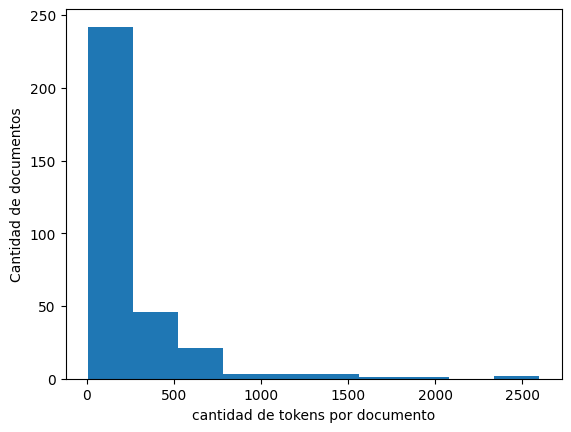

In [12]:
import matplotlib.pyplot as plt
docs['tokens'].plot.hist()

plt.xlabel('cantidad de tokens por documento')
plt.ylabel('Cantidad de documentos')

In [13]:
docs['tokens'].mean()

237.22360248447205

In [14]:
# $0.0001 / 1K tokens (openai.com/pricing)
print('número de tokens:', docs.tokens.sum())
print('precio:', round(docs.tokens.sum()/1000*0.0001*4000), 'pesos')

número de tokens: 76386
precio: 31 pesos
